# Agricultural Exports Categories Analysis
*by Sergio Postigo and Víctor Diví*

## 6. Model Building

In this section we will create predictive models using different approaches

In [1]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec
from tqdm.notebook import tqdm

train = pd.read_csv('../data/preprocessed_data/train_data.csv')
test = pd.read_csv('../data/preprocessed_data/test_data.csv')

comercial_description_model = Doc2Vec.load('../models/comercial_descriptions_doc2vec_model')
custom_description_model = Doc2Vec.load('../models/custom_descriptions_doc2vec_model')

### 6.1. Dataframe building

First, let's create the train and test dataframes.
We start by computing the numerical representation of the text fields (namely *Descripcion Comercial* and *Descripcion de la Partida Aduanera*) using the previously created models

In [2]:
train_comercial = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                   tqdm(train['Descripcion Comercial'].values)]
train_customs = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                 tqdm(train['Descripcion de la Partida Aduanera'].values)]

  0%|          | 0/207540 [00:00<?, ?it/s]

  0%|          | 0/207540 [00:00<?, ?it/s]

In [3]:
comercial_columns = [f'Descripcion Comercial {i}' for i in range(len(train_comercial[0]))]
customs_columns = [f'Descripcion de la Partida Aduanera {i}' for i in range(len(train_comercial[0]))]

In [4]:
train_comercial_df = pd.DataFrame(train_comercial, columns=comercial_columns)
train_customs_df = pd.DataFrame(train_customs, columns=customs_columns)
train_df = pd.concat([train, train_comercial_df, train_customs_df], axis=1)
train_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,Descripcion de la Partida Aduanera 0,Descripcion de la Partida Aduanera 1,Descripcion de la Partida Aduanera 2,Descripcion de la Partida Aduanera 3,Descripcion de la Partida Aduanera 4,Descripcion de la Partida Aduanera 5,Descripcion de la Partida Aduanera 6,Descripcion de la Partida Aduanera 7,Descripcion de la Partida Aduanera 8,Descripcion de la Partida Aduanera 9
0,4,arabia saudita,granadas frescas cajas variead wonderful acoge...,demas frutas frutos frescos,0.549177,Granada,0.017617,0.138425,0.090182,0.164198,...,0.069178,0.095617,0.146412,0.092962,0.062888,0.073751,0.200626,0.050174,-0.071582,-0.003315
1,5,canada,quinua blanca sacos consumo humano acoge resti...,demas alforfon mijo alpiste demas cereales,0.486531,Quinua,-0.007316,0.117512,-0.000210,0.135758,...,0.081620,0.207703,0.144169,0.271993,0.053635,0.238468,0.434541,0.097320,-0.167761,-0.087370
2,10,reino unido,esparragos frescos uso consumo humano acoge re...,esparragos frescos refrigerados,0.229562,Espárrago,-0.014778,0.170057,0.117486,-0.039066,...,0.064096,0.140823,0.093358,0.257034,0.061540,0.148534,0.232068,0.057359,-0.126935,-0.128202
3,8,estados unidos,mandarinas frescas cajas variedad tango acoge ...,demas clementinas,0.833333,Mandarina,-0.007892,0.006810,0.056083,0.034596,...,0.081511,0.123089,0.179249,0.089841,0.015433,0.075755,0.293461,0.066337,-0.072032,-0.090439
4,6,japon,arveja fresca dulce cajas acoge drawback,arvejas guisantes chicharos pisum sativum fres...,0.225000,Arveja,0.137781,0.028937,0.079562,0.003892,...,-0.005171,0.135387,0.087337,0.182131,0.014572,0.070732,0.160108,-0.004979,-0.120563,-0.046819


In [5]:
test_comercial = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                  tqdm(test['Descripcion Comercial'].values)]
test_customs = [comercial_description_model.infer_vector(row.split(), epochs=10) for row in
                tqdm(test['Descripcion de la Partida Aduanera'].values)]

  0%|          | 0/51885 [00:00<?, ?it/s]

  0%|          | 0/51885 [00:00<?, ?it/s]

In [6]:
test_comercial_df = pd.DataFrame(test_comercial, columns=comercial_columns)
test_customs_df = pd.DataFrame(test_customs, columns=customs_columns)
test_df = pd.concat([test, test_comercial_df, test_customs_df], axis=1)
test_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,Descripcion de la Partida Aduanera 0,Descripcion de la Partida Aduanera 1,Descripcion de la Partida Aduanera 2,Descripcion de la Partida Aduanera 3,Descripcion de la Partida Aduanera 4,Descripcion de la Partida Aduanera 5,Descripcion de la Partida Aduanera 6,Descripcion de la Partida Aduanera 7,Descripcion de la Partida Aduanera 8,Descripcion de la Partida Aduanera 9
0,7,rumania,quinua blanca convencional presentado per bag ...,demas alforfon mijo alpiste demas cereales,0.684932,Quinua,0.034222,0.155785,0.032316,0.040893,...,0.083222,0.217732,0.207466,0.254376,0.068098,0.293553,0.447961,0.084919,-0.134521,-0.092421
1,7,china,arandanos frescos cajas cold treatment acoge d...,arandanos murtones demas frutos genero vaccini...,0.150000,Arándano,0.094891,0.085741,-0.000996,0.144263,...,-0.028236,0.164114,0.051585,0.127489,0.069856,0.187610,0.199040,0.020327,-0.058644,0.006389
2,10,chile,zapallo fresco lotes agranel producto agricola...,calabazas zapallos calabacines cucurbita spp,10.000000,Zapallo,-0.035652,0.126647,0.081181,0.039480,...,-0.037886,0.105795,0.114410,-0.020385,0.050668,-0.034401,0.132690,0.124990,-0.056103,0.005442
3,12,mexico,pimiento paprika entero seco codigo restitucio...,demas pimienta genero piper frutos generos cap...,0.280171,Paprika,0.049733,0.168249,-0.001172,0.014151,...,-0.057367,0.210608,0.275939,0.228679,0.066467,0.168747,0.315917,0.152142,-0.008425,-0.194489
4,9,paises bajos,ramos flores frescas wax flower white grado we...,demas flores capullos cortados ramos adornos f...,0.306558,Flores,0.043587,0.160461,0.084390,0.097956,...,0.004838,-0.020901,0.173028,-0.116855,-0.092591,0.069434,0.012428,0.098881,0.031653,-0.114650


Then, we codify categorical fields (namely *Fecha* and *Pais de Destino*) into a set of binary fields
Note that for *Pais de Destino*, there's the possibility that during the down-sampling of the data some country were lost. If that were the case, we would need to go to the raw data to build the sets.

In [7]:
from sklearn.preprocessing import OneHotEncoder
import unidecode

all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()
all_countries = [unidecode.unidecode(country.lower()) for country in all_countries]

C:\Users\Victor\AppData\Local\Temp\ipykernel_2376\2337497206.py:4: DtypeWarning: Columns (6,14,16,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  all_countries = pd.read_csv('../data/raw_data/data.csv', encoding='latin-1', sep=';')["Pais de Destino"].unique()


In [8]:
country_encoder = OneHotEncoder(categories=[all_countries])

train_countries = country_encoder.fit_transform(train_df['Pais de Destino'].values.reshape(-1, 1))
test_countries = country_encoder.fit_transform(test_df['Pais de Destino'].values.reshape(-1, 1))

In [9]:
train_countries_df = pd.DataFrame.sparse.from_spmatrix(train_countries, columns=all_countries)
test_countries_df = pd.DataFrame.sparse.from_spmatrix(test_countries, columns=all_countries)

train_countries_df.head()

,chile,australia,jordania,brasil,estados unidos,espana,suiza,italia,aruba,paises bajos,...,gabon,togo,mozambique,nueva caledonia,benin,bahamas,zambia,cabo verde,barbados,serbia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
month_encoder = OneHotEncoder()

train_months = month_encoder.fit_transform(train_df['Fecha'].values.reshape(-1, 1))
test_months = month_encoder.fit_transform(test_df['Fecha'].values.reshape(-1, 1))

In [11]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
          'December']
train_months_df = pd.DataFrame.sparse.from_spmatrix(train_months, columns=months)
test_months_df = pd.DataFrame.sparse.from_spmatrix(test_months, columns=months)

train_months_df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_df = pd.concat([train_df, train_countries_df, train_months_df], axis=1)
test_df = pd.concat([test_df, test_countries_df, test_months_df], axis=1)

train_df.head()

,Fecha,Pais de Destino,Descripcion Comercial,Descripcion de la Partida Aduanera,usd_kg,Categoría macro Aurum,Descripcion Comercial 0,Descripcion Comercial 1,Descripcion Comercial 2,Descripcion Comercial 3,...,March,April,May,June,July,August,September,October,November,December
0,4,arabia saudita,granadas frescas cajas variead wonderful acoge...,demas frutas frutos frescos,0.549177,Granada,0.017617,0.138425,0.090182,0.164198,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,canada,quinua blanca sacos consumo humano acoge resti...,demas alforfon mijo alpiste demas cereales,0.486531,Quinua,-0.007316,0.117512,-0.000210,0.135758,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,reino unido,esparragos frescos uso consumo humano acoge re...,esparragos frescos refrigerados,0.229562,Espárrago,-0.014778,0.170057,0.117486,-0.039066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8,estados unidos,mandarinas frescas cajas variedad tango acoge ...,demas clementinas,0.833333,Mandarina,-0.007892,0.006810,0.056083,0.034596,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,japon,arveja fresca dulce cajas acoge drawback,arvejas guisantes chicharos pisum sativum fres...,0.225000,Arveja,0.137781,0.028937,0.079562,0.003892,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.2. Multi-Layer Perceptron

#### 6.2.1. Using only text colums

##### 6.2.1.1 Using *Descripcion Comercial* (comercial description)

In [13]:
from sklearn.neural_network import MLPClassifier

clf_comercial = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                              early_stopping=True, verbose=True)
clf_comercial.fit(train_df[comercial_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.87625111
Validation score: 0.217356
Iteration 2, loss = 2.49246526
Validation score: 0.326347
Iteration 3, loss = 2.35263517
Validation score: 0.333671
Iteration 4, loss = 2.32871791
Validation score: 0.336610
Iteration 5, loss = 2.31560391
Validation score: 0.339501
Iteration 6, loss = 2.30489622
Validation score: 0.338971
Iteration 7, loss = 2.29457322
Validation score: 0.346343
Iteration 8, loss = 2.28356471
Validation score: 0.346777
Iteration 9, loss = 2.27124143
Validation score: 0.347644
Iteration 10, loss = 2.25735855
Validation score: 0.354534
Iteration 11, loss = 2.24365186
Validation score: 0.358292
Iteration 12, loss = 2.23252547
Validation score: 0.362725
Iteration 13, loss = 2.22332926
Validation score: 0.366387
Iteration 14, loss = 2.21665271
Validation score: 0.370338
Iteration 15, loss = 2.21128764
Validation score: 0.370435
Iteration 16, loss = 2.20625930
Validation score: 0.371446
Iteration 17, loss = 2.20214316
Validation score: 0.371398
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [14]:
predictions = clf_comercial.predict(test_df[comercial_columns].values)

Get the % of accuracy

In [15]:
accuracy = sum(x == y for x, y in zip(test_df['Categoría macro Aurum'].values, predictions)) / len(predictions)
print("The accuracy of the predictions is: " + str(round(accuracy * 100, 2)) + "%")

The accuracy of the predictions is: 40.55%


Create a confusion matrix

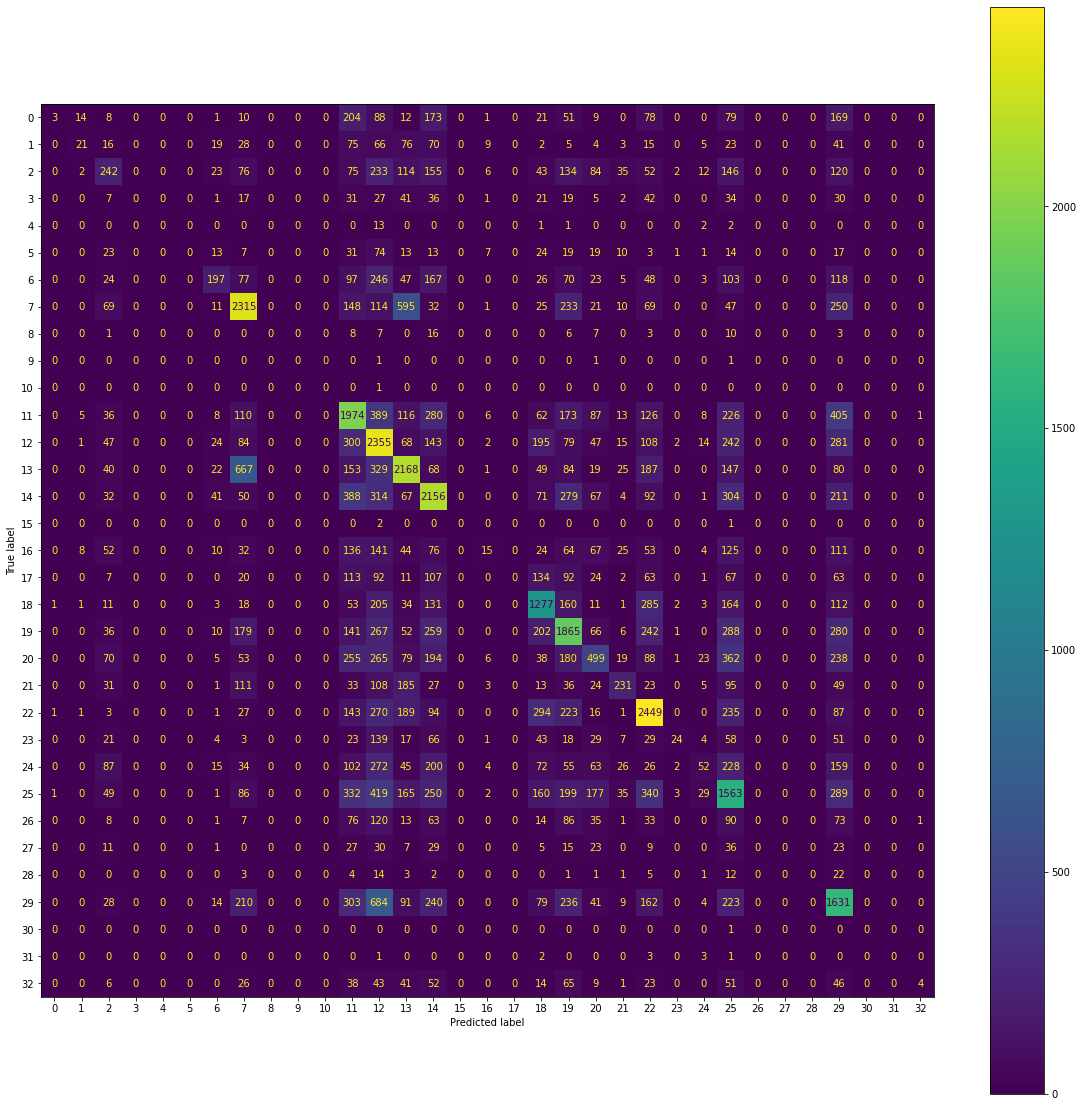

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### 6.2.1.2 Using *Descripcion de la Partida Aduanera* (customs description)

In [17]:
clf_customs = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                            early_stopping=True, verbose=True)
clf_customs.fit(train_df[customs_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.39215158
Validation score: 0.552424
Iteration 2, loss = 1.35537339
Validation score: 0.688831
Iteration 3, loss = 1.05933989
Validation score: 0.748241
Iteration 4, loss = 0.92487549
Validation score: 0.771562
Iteration 5, loss = 0.83832286
Validation score: 0.788715
Iteration 6, loss = 0.77112171
Validation score: 0.802785
Iteration 7, loss = 0.72621142
Validation score: 0.816084
Iteration 8, loss = 0.69207629
Validation score: 0.825528
Iteration 9, loss = 0.66529256
Validation score: 0.828804
Iteration 10, loss = 0.64372225
Validation score: 0.834490
Iteration 11, loss = 0.62566059
Validation score: 0.836224
Iteration 12, loss = 0.60975498
Validation score: 0.841284
Iteration 13, loss = 0.59623261
Validation score: 0.843837
Iteration 14, loss = 0.58331326
Validation score: 0.847981
Iteration 15, loss = 0.57086219
Validation score: 0.850294
Iteration 16, loss = 0.55871385
Validation score: 0.854197
Iteration 17, loss = 0.54740532
Validation score: 0.858244
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [21]:
predictions = clf_customs.predict(test_df[customs_columns].values)

Get the % of accuracy

In [22]:
accuracy = sum(x == y for x, y in zip(test_df['Categoría macro Aurum'].values, predictions)) / len(predictions)
print("The accuracy of the predictions is: " + str(round(accuracy * 100, 2)) + "%")

The accuracy of the predictions is: 90.21%


Create a confusion matrix


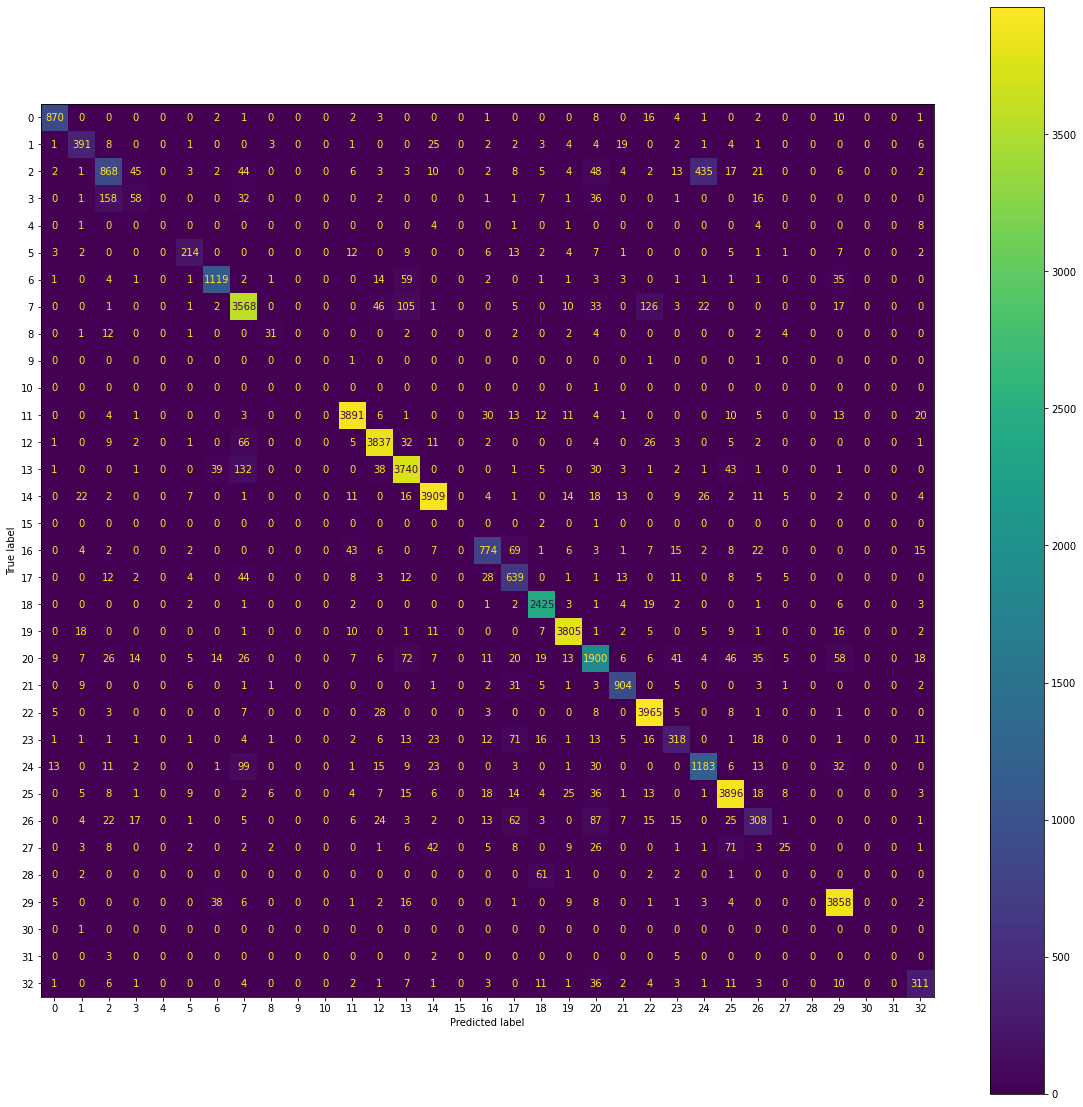

In [23]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

##### 6.2.1.3 Using *Descripcion Comercial* (comercial description) and *Descripcion de Partida Aduanera* (customs description)

In [24]:
clf_descriptions = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1,
                                 max_iter=1000,
                                 early_stopping=True, verbose=True)
clf_descriptions.fit(train_df[customs_columns + comercial_columns].values, train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.35522924
Validation score: 0.558350
Iteration 2, loss = 1.33288403
Validation score: 0.711766
Iteration 3, loss = 1.02841454
Validation score: 0.753060
Iteration 4, loss = 0.89230175
Validation score: 0.776525
Iteration 5, loss = 0.81073601
Validation score: 0.794064
Iteration 6, loss = 0.75209282
Validation score: 0.807507
Iteration 7, loss = 0.70395596
Validation score: 0.818782
Iteration 8, loss = 0.66305670
Validation score: 0.827455
Iteration 9, loss = 0.62950253
Validation score: 0.835887
Iteration 10, loss = 0.60183321
Validation score: 0.842392
Iteration 11, loss = 0.57892624
Validation score: 0.846295
Iteration 12, loss = 0.56080024
Validation score: 0.850679
Iteration 13, loss = 0.54530901
Validation score: 0.853185
Iteration 14, loss = 0.53206628
Validation score: 0.852944
Iteration 15, loss = 0.52009772
Validation score: 0.856606
Iteration 16, loss = 0.50919693
Validation score: 0.859304
Iteration 17, loss = 0.49989383
Validation score: 0.862147
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

Now we will test the accuracy of the model using our testing data

In [25]:
predictions = clf_descriptions.predict(test_df[customs_columns + comercial_columns].values)

Get the % of accuracy

In [26]:
accuracy = sum(x == y for x, y in zip(test_df['Categoría macro Aurum'].values, predictions)) / len(predictions)
print("The accuracy of the predictions is: " + str(round(accuracy * 100, 2)) + "%")

The accuracy of the predictions is: 91.46%


Create a confusion matrix

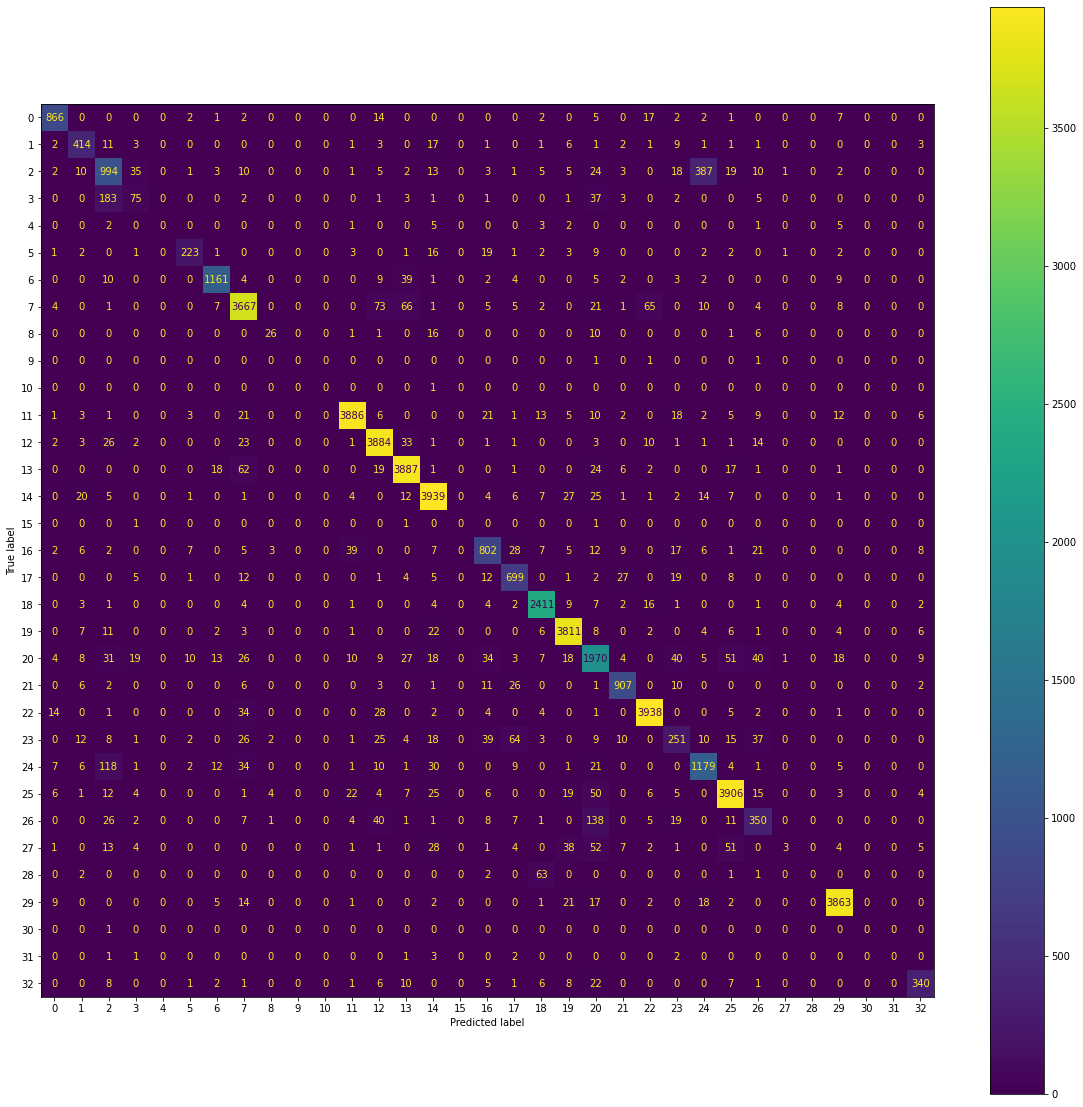

In [27]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)

#### 6.2.2. Using all data

In [28]:
clf_full = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(16, 8, 8), random_state=1, max_iter=1000,
                         early_stopping=True, verbose=True)
clf_full.fit(train_df[customs_columns + comercial_columns + all_countries + months].values,
             train_df['Categoría macro Aurum'].values)

Iteration 1, loss = 2.21846258
Validation score: 0.648983
Iteration 2, loss = 1.09807834
Validation score: 0.732485
Iteration 3, loss = 0.88522251
Validation score: 0.778838
Iteration 4, loss = 0.76854734
Validation score: 0.803315
Iteration 5, loss = 0.69607902
Validation score: 0.821673
Iteration 6, loss = 0.63880283
Validation score: 0.842344
Iteration 7, loss = 0.57988843
Validation score: 0.854823
Iteration 8, loss = 0.53579989
Validation score: 0.862533
Iteration 9, loss = 0.50419470
Validation score: 0.869567
Iteration 10, loss = 0.47931803
Validation score: 0.877132
Iteration 11, loss = 0.45991283
Validation score: 0.880168
Iteration 12, loss = 0.44387644
Validation score: 0.883637
Iteration 13, loss = 0.43041790
Validation score: 0.887973
Iteration 14, loss = 0.42044735
Validation score: 0.890575
Iteration 15, loss = 0.41046712
Validation score: 0.892792
Iteration 16, loss = 0.40304354
Validation score: 0.895008
Iteration 17, loss = 0.39575961
Validation score: 0.895297
Iterat

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 8, 8),
              max_iter=1000, random_state=1, verbose=True)

In [29]:
predictions = clf_full.predict(test_df[customs_columns + comercial_columns + all_countries + months].values)

Get the % of accuracy

In [30]:
# Get the % of accuracy
accuracy = sum(x == y for x, y in zip(test_df['Categoría macro Aurum'].values, predictions)) / len(predictions)
print("The accuracy of the predictions is: " + str(round(accuracy * 100, 2)) + "%")

The accuracy of the predictions is: 92.77%


Create a confusion matrix

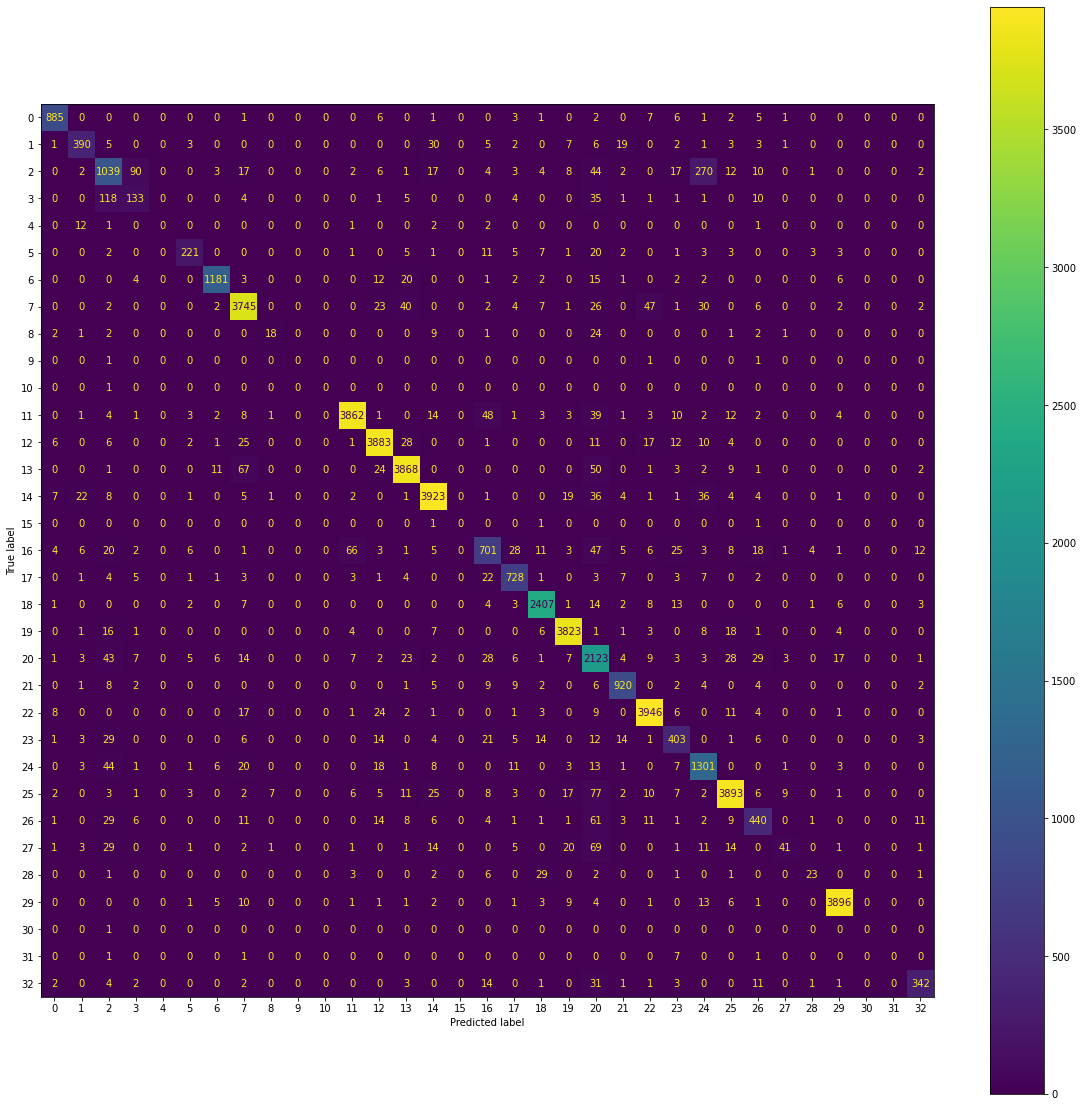

In [33]:
_, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix(test_df['Categoría macro Aurum'].values, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax)